Finishing the EDA from where we left it in week 9

In [132]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA

In [9]:
data = pd.read_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/cleaned_data.csv", sep=",")

In [10]:
data.head()

,education,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,261.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,57.0,149.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,37.0,226.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,151.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56.0,307.0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0


In [11]:
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
           'euribor3m', 'nr.employed']

# Correlations

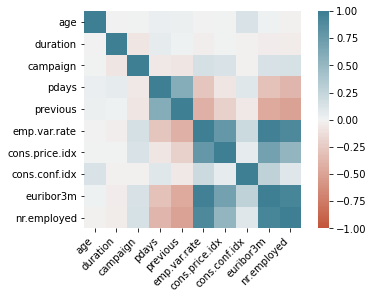

In [16]:
num_data = data.loc[:, num_col]
corr = num_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Dimensionality reduction

In [88]:
data_s = pd.read_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/cleaned_data_scaled.csv", sep=",")

In [89]:
X_s = data_s.loc[:, data_s.columns != 'y_yes']
X_s.describe()

,education,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.662750,0.284248,0.052518,0.028502,0.036783,0.024709,0.725393,0.535723,0.430854,0.677237,...,0.334296,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335
std,0.243974,0.128657,0.052720,0.050364,0.188230,0.070700,0.327283,0.225581,0.193648,0.393210,...,0.471750,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.185185,0.020740,0.000000,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.666667,0.259259,0.036600,0.018182,0.000000,0.000000,0.937500,0.603274,0.376569,0.957379,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.833333,0.370370,0.064864,0.036364,0.000000,0.000000,1.000000,0.698753,0.602510,0.980957,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [92]:
X_s.shape

(41188, 39)

In [93]:
X_s2 = clean_dataset(X_s)
X_s2.shape

c:\users\almudena\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(41188, 39)

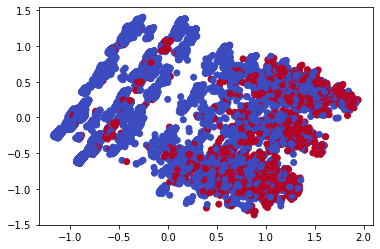

In [131]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(X_s)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=data.y_yes, cmap = 'coolwarm')
plt.show()

## Feature importance

In [126]:
X = data.loc[:, data.columns != 'y_yes']
Y = data.loc[:, 'y_yes']
names = X.columns.values

rfc = RandomForestClassifier()

rfc.fit(X_s, Y)

forest_importances = pd.Series(rfc.feature_importances_, index=names)

forest_importances.sort_values(ascending=False)

job_entrepreneur        0.327955
job_technician          0.103899
job_blue-collar         0.099851
job_unemployed          0.057490
job_housemaid           0.047910
education               0.043853
job_student             0.028437
nr.employed             0.025897
job_management          0.024034
job_services            0.022005
job_self-employed       0.020774
month_oct               0.013841
job_retired             0.013178
previous                0.012272
month_may               0.012259
emp.var.rate            0.012093
cons.conf.idx           0.011868
month_sep               0.011710
cons.price.idx          0.011486
day_of_week_mon         0.010834
marital_married         0.009856
euribor3m               0.008562
month_aug               0.008133
month_jun               0.007485
month_dec               0.006508
campaign                0.005381
month_jul               0.005244
month_mar               0.004974
marital_single          0.004679
month_nov               0.004621
poutcome_s

Text(0.5, 1.0, 'Variable Importance')

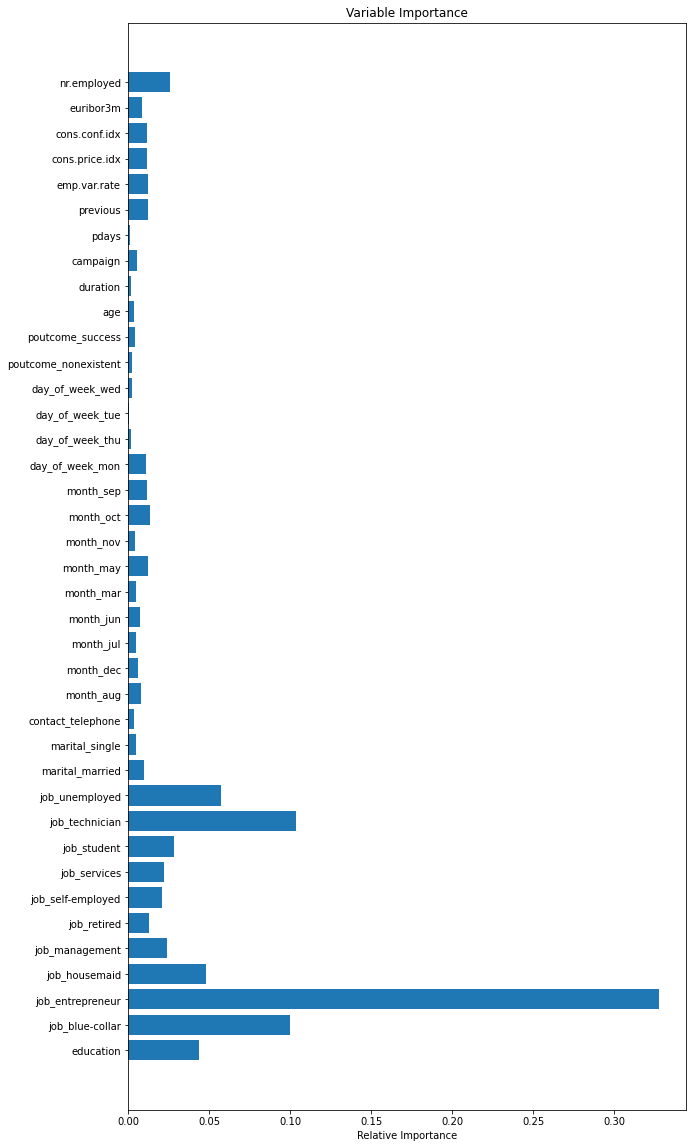

In [127]:
# Plot the data
plt.figure(figsize=(10, 20))
plt.barh(forest_importances.index, forest_importances, align='center')

plt.xlabel("Relative Importance")
plt.title("Variable Importance")

In [128]:
test = SelectKBest(score_func=f_classif)
fit = test.fit(X_s, Y)
kbest_importances = pd.Series(fit.scores_, index=names)
kbest_importances.sort_values(ascending=False)

job_entrepreneur        8094.101634
job_unemployed          5926.610646
job_management          4859.909473
nr.employed             4577.560712
job_technician          4309.479048
job_self-employed       4023.829925
job_retired             2304.257088
euribor3m               1602.199832
day_of_week_mon          881.707070
poutcome_success         872.290501
campaign                 792.101543
job_services             778.589786
pdays                    665.139273
age                      488.535968
month_mar                366.809084
month_dec                353.278432
day_of_week_tue          260.659103
marital_married          229.392640
job_housemaid            182.156673
job_student              124.409975
month_sep                121.047646
education                 81.868438
month_oct                 77.714719
month_jun                 43.016131
day_of_week_wed           42.827656
job_blue-collar           38.094659
previous                  18.632560
marital_single            11

In [136]:
index_to_drop = forest_importances.index[forest_importances<0.01].intersection(kbest_importances.index[kbest_importances<500])
index_to_drop

Index(['marital_married', 'marital_single', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'age', 'duration'],
      dtype='object')

In [140]:
data2 = data.drop(index_to_drop, axis=1)
data2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data.csv", index=False)

In [141]:
data_s2 = data_s.drop(index_to_drop, axis=1)
data_s2.to_csv(f"{os.path.dirname(os.path.abspath(''))}/bank-additional/filtered_data_scaled.csv", index=False)